**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(UpSetR)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = "region.annotation.fcc_starrmpracrispr.concat.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_starrmpracrispr.concat.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.fcc_starrmpracrispr.concat.tsv 


In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = "region.annotation.fcc_starrmpracrispr.assayvote.filtered.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_starrmpracrispr.assayvote.filtered.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.fcc_starrmpracrispr.assayvote.filtered.tsv 


## Import data

In [5]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    txt_fname = "region.annotation.fcc_starrmpracrispr.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_fcc_peak_concat = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 156686      6

$fcc_astarr_macs_input_union
[1] 201420      6



Chrom,ChromStart,ChromEnd,Region,Group,Label
chr1,10038,10405,chr1:10038-10405,ASTARR,ASTARR_R
chr1,16025,16338,chr1:16025-16338,ASTARR,ASTARR_R
chr1,17288,17689,chr1:17288-17689,ASTARR,ASTARR_R


In [6]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    txt_fname = "region.annotation.fcc_starrmpracrispr.assayvote.filtered.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_fcc_assayvote_filter = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 33953     6

$fcc_astarr_macs_input_union
[1] 39788     6



Chrom,ChromStart,ChromEnd,Region,Num_Assay,Assays
chr1,605104,605675,chr1:605104-605675,2,"ASTARR,CRISPRi-Growth"
chr1,778233,779389,chr1:778233-779389,3,"ASTARR,LMPRA,WSTARR"
chr1,818708,819335,chr1:818708-819335,2,"ASTARR,WSTARR"


## Arrange table

**Helper function**

In [7]:
fun = function(vec_txt_input){
    vec_txt_pattern = c("STARR", "MPRA", "CRISPR", "E2G")
    vec_txt_replace = c("STARR", "MPRA", "CRISPR", "CRISPR")
    vec_txt_output = fun_str_map_detect(
        vec_txt_input, 
        vec_txt_pattern,
        vec_txt_replace
    )
    return(vec_txt_output)
}

fun(c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth", "E2G-Benchmark"))

[1] "STARR"  "STARR"  "MPRA"   "MPRA"   "CRISPR" "CRISPR" "CRISPR"

**Filter regions by assay vote**

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get tables
    dat_region_annot_fcc_peak  = lst_dat_region_annot_fcc_peak_concat[[txt_folder]]
    dat_region_annot_fcc_vote2 = lst_dat_region_annot_fcc_assayvote_filter[[txt_folder]]

    ### get fcc vote2 regions
    dat = dat_region_annot_fcc_vote2
    vec = dat$Region
    vec_txt_region = vec

    ### filter fcc peak
    dat = dat_region_annot_fcc_peak
    dat = dat %>% dplyr::filter(Region %in% vec_txt_region)

    ### label assay type and simplify
    dat = dat %>% dplyr::mutate(Type = fun(Group))
    return(dat)
})

### assign and show
lst_dat_region_annot_fcc_peak_filter = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 87247     7

$fcc_astarr_macs_input_union
[1] 101409      7



Chrom,ChromStart,ChromEnd,Region,Group,Label,Type
chr1,605104,605675,chr1:605104-605675,ASTARR,ASTARR_A,STARR
chr1,778233,779389,chr1:778233-779389,ASTARR,ASTARR_A,STARR
chr1,778233,779389,chr1:778233-779389,LMPRA,LMPRA_A,MPRA


## Explore: Count table

In [9]:
lst = lst_dat_region_annot_fcc_peak_filter
lst = lapply(lst, function(dat){
    vec = unique(dat$Region)
    num = length(vec)
    names(num) = "Count"
    return(num)
})

dat = bind_rows(lst, .id = "Region")

### assign and show
dat_region_annot_count_total = dat
fun_display_table(dat)

Region,Count
fcc_astarr_macs_input_overlap,33953
fcc_astarr_macs_input_union,39788


In [10]:
dat = dat_region_annot_count_total
dat = dat %>%
    dplyr::mutate(Region = fun_str_map_atac(Region)) %>%
    dplyr::mutate(Count  = scales::comma(Count))

fun_markdown_table(dat)



|Region         |Count  |
|:--------------|:------|
|ATAC (Overlap) |33,953 |
|ATAC (Union)   |39,788 |

In [11]:
lst = lst_dat_region_annot_fcc_peak_filter
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()    
    res = table(dat$Group, dnn = c("Group"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")

### assign and show
dat_region_annot_count_by_group = dat
fun_display_table(dat)

Region,Group,Freq
fcc_astarr_macs_input_overlap,ASTARR,32021
fcc_astarr_macs_input_overlap,CRISPRi-Growth,3713
fcc_astarr_macs_input_overlap,CRISPRi-HCRFF,49
fcc_astarr_macs_input_overlap,E2G-Benchmark,330
fcc_astarr_macs_input_overlap,LMPRA,18043
fcc_astarr_macs_input_overlap,TMPRA,655
fcc_astarr_macs_input_overlap,WSTARR,25331
fcc_astarr_macs_input_union,ASTARR,37777
fcc_astarr_macs_input_union,CRISPRi-Growth,4175
fcc_astarr_macs_input_union,CRISPRi-HCRFF,51


In [12]:
dat = dat_region_annot_count_by_group
dat = dat %>%
    dplyr::mutate(Region = fun_str_map_atac(Region)) %>%
    dplyr::mutate(Freq   = scales::comma(Freq))
dat = dat %>% tidyr::spread(Region, Freq)

fun_markdown_table(dat)



|Group          |ATAC (Overlap) |ATAC (Union) |
|:--------------|:--------------|:------------|
|ASTARR         |32,021         |37,777       |
|CRISPRi-Growth |3,713          |4,175        |
|CRISPRi-HCRFF  |49             |51           |
|E2G-Benchmark  |330            |338          |
|LMPRA          |18,043         |19,091       |
|TMPRA          |655            |796          |
|WSTARR         |25,331         |30,357       |

In [13]:
lst = lst_dat_region_annot_fcc_peak_filter
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Type) %>% dplyr::distinct()    
    res = table(dat$Type, dnn = c("Type"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")

### assign and show
dat_region_annot_count_by_type = dat
fun_display_table(dat)

Region,Type,Freq
fcc_astarr_macs_input_overlap,CRISPR,4036
fcc_astarr_macs_input_overlap,MPRA,18495
fcc_astarr_macs_input_overlap,STARR,33796
fcc_astarr_macs_input_union,CRISPR,4507
fcc_astarr_macs_input_union,MPRA,19650
fcc_astarr_macs_input_union,STARR,39623


In [14]:
dat = dat_region_annot_count_by_type
dat = dat %>%
    dplyr::mutate(Region = fun_str_map_atac(Region)) %>%
    dplyr::mutate(Freq   = scales::comma(Freq))
dat = dat %>% tidyr::spread(Region, Freq)

fun_markdown_table(dat)



|Type   |ATAC (Overlap) |ATAC (Union) |
|:------|:--------------|:------------|
|CRISPR |4,036          |4,507        |
|MPRA   |18,495         |19,650       |
|STARR  |33,796         |39,623       |

## Explore: Region Overlap

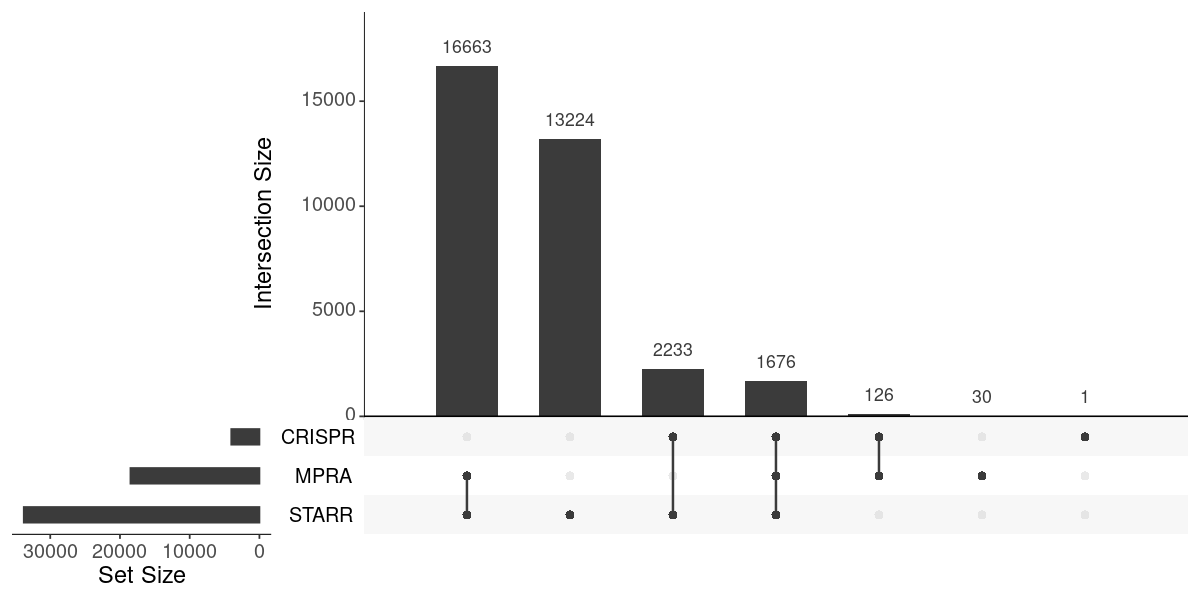

In [15]:
lst = lst_dat_region_annot_fcc_peak_filter
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::select(Region, Type) %>% dplyr::distinct()
lst = split(dat$Region, dat$Type)

plt = upset(
    fromList(lst), 
    order.by = "freq", 
    mb.ratio = c(0.7, 0.3),
    text.scale=1.7
)

### assign and show
plt_export_upset = plt
options(repr.plot.height=5, repr.plot.width=10)
print(plt)

**Save plots**

In [16]:
plt_export = plt_export_upset
txt_export = "fig.region_annot.astarr_input_overlap.fcc_starrmpracrispr_vote2.upset.type"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)

png(txt_fpath, height = 5, width = 10, units = "in", res = 300)
print(plt_export)
dev.off()

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)

svg(txt_fpath, height = 5, width = 10)
print(plt_export)
dev.off()

pdf 
  2

pdf 
  2